In [16]:
import tensorflow as tf
import numpy as np
import datetime
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.2.0'

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

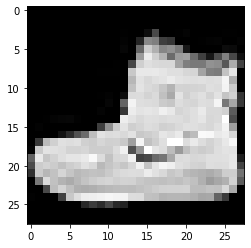

In [15]:
plt.imshow(X_train[0], cmap="gray")

In [8]:
y_train[0]

9

In [17]:
#Normalizing
X_train = X_train/255
X_test = X_test/255

In [21]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
X_train.shape

(60000, 28, 28)

In [23]:
#Flatten
X_train = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2])

In [24]:
X_train.shape

(60000, 784)

In [25]:
X_test = X_test.reshape(-1, X_test.shape[1] * X_test.shape[2])

In [62]:
#Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1], )))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=np.unique(y_train).shape[0], activation="softmax"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 2s 858us/step - loss: 0.5571 - sparse_categorical_accuracy: 0.8001
Epoch 2/100
1875/1875 [==============================] - 2s 883us/step - loss: 0.4164 - sparse_categorical_accuracy: 0.8483
Epoch 3/100
1875/1875 [==============================] - 2s 852us/step - loss: 0.3821 - sparse_categorical_accuracy: 0.8601
Epoch 4/100
1875/1875 [==============================] - 2s 858us/step - loss: 0.3589 - sparse_categorical_accuracy: 0.8673
Epoch 5/100
1875/1875 [==============================] - 2s 846us/step - loss: 0.3436 - sparse_categorical_accuracy: 0.8725
Epoch 6/100
1875/1875 [==============================] - 2s 849us/step - loss: 0.3308 - sparse_categorical_accuracy: 0.8781
Epoch 7/100
1875/1875 [==============================] - 2s 855us/step - loss: 0.3225 - sparse_categorical_accuracy: 0.8799
Epoch 8/100
1875/1875 [==============================] - 2s 845us/step - loss: 0.3126 - sparse_categorical_accuracy: 0.8849
Epoch 9/

1875/1875 [==============================] - 2s 836us/step - loss: 0.1882 - sparse_categorical_accuracy: 0.9295
Epoch 67/100
1875/1875 [==============================] - 2s 837us/step - loss: 0.1902 - sparse_categorical_accuracy: 0.9272
Epoch 68/100
1875/1875 [==============================] - 2s 870us/step - loss: 0.1889 - sparse_categorical_accuracy: 0.9285
Epoch 69/100
1875/1875 [==============================] - 2s 876us/step - loss: 0.1889 - sparse_categorical_accuracy: 0.9289
Epoch 70/100
1875/1875 [==============================] - 2s 899us/step - loss: 0.1843 - sparse_categorical_accuracy: 0.9292
Epoch 71/100
1875/1875 [==============================] - 2s 853us/step - loss: 0.1868 - sparse_categorical_accuracy: 0.9278
Epoch 72/100
1875/1875 [==============================] - 2s 839us/step - loss: 0.1853 - sparse_categorical_accuracy: 0.9304
Epoch 73/100
1875/1875 [==============================] - 2s 891us/step - loss: 0.1845 - sparse_categorical_accuracy: 0.9309
Epoch 74/100


In [64]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 505us/step - loss: 0.4112 - sparse_categorical_accuracy: 0.8903


In [65]:
print(f"Test accuracy: {test_accuracy}")

Test accuracy: 0.8902999758720398


In [66]:
test_loss

0.41121992468833923

In [67]:
y_hat = model.predict(X_test)
y_hat = np.array([np.argmax(y) for y in y_hat])

In [68]:
y_hat

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [69]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)